# OpenCV Contours 

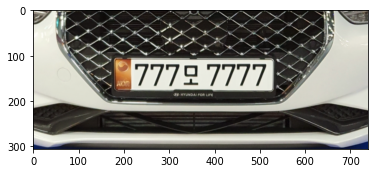

In [1]:
import cv2
import matplotlib.pyplot as plt 

image = cv2.imread('./car_number2.png')
plt.imshow(image)

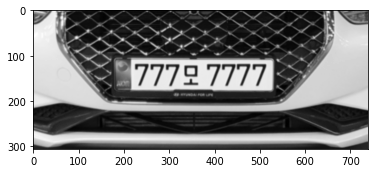

In [7]:
#gray 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#img_blurred = cv2.GaussianBlur(img_gray, ksize=(5,5), sigmaX = 1)
gray_blur = cv2.GaussianBlur(gray, ksize=(5,5), sigmaX =1)
ret, thresh = cv2.threshold(gray, 127,255,0)
plt.imshow(gray_blur, cmap='gray')

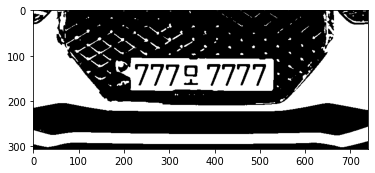

In [9]:
#tresholding
#rgb로 바꾼 이미지를 넣었을때는 안됨 에러남 
#블러처리를 하고나서 하니까 검은색이 더 많아짐 
# img_thresh = cv2.adaptiveThreshold(
#     img_blurred,
#     maxValue=255.0,
#     adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#     thresholdType=cv2.THRESH_BINARY_INV,
#     blockSize=21,
#     C=9
# )
# plt.imshow(img_thresh, 'gray')


ret, thresh = cv2.threshold(gray_blur,127,255,0)
plt.imshow(thresh, cmap = 'gray')

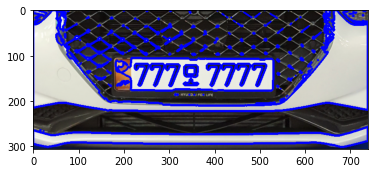

In [12]:
# contours, _ = cv2.findContours(
#     img_thresh,
#     mode=cv2.RETR_LIST,
#     method=cv2.CHAIN_APPROX_SIMPLE
# )


contours, hierarchy = cv2.findContours(thresh, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    image = cv2.drawContours(image, [contours[i]], -1, (0,0,255),4)

plt.imshow(image, cmap='gray')

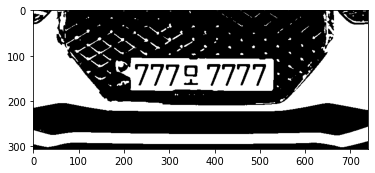

In [17]:
import cv2
import numpy as np

img = cv2.imread('./car_number2.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, ksize=(5,5), sigmaX = 1) # 블러 처리

#흑백 이미지 
ret, thresh = cv2.threshold(img_blur,127,255,0)
plt.imshow(thresh, cmap='gray')


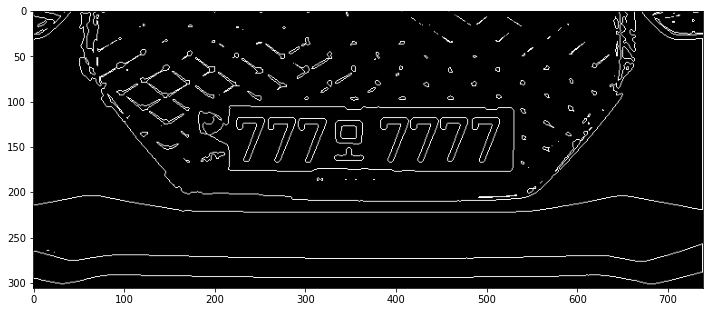

In [20]:
contours, _ = cv2.findContours(
    thresh,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)

#같은 크기의 nparray 생성
height, width, channel = image.shape
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

# 그리기
cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255,255,255)) 

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)

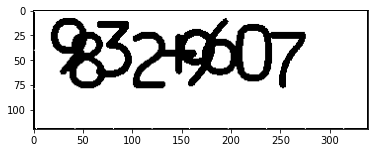

In [28]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

image = cv2.imread('./digit_image.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray,230,255,0)

binary = cv2.bitwise_not(binary)
plt.imshow(cv2.cvtColor(binary, cv2.COLOR_GRAY2RGB))
plt.show()


In [34]:
contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, method = cv2.CHAIN_APPROX_NONE)
for i in range(len(contours)):
    cv2.drawContours(image, [contours[i]], 0, (0, 0, 255), 2)
    cv2.imshow("image", image)
    cv2.waitKey(0)

#키 누를때마다 윤곽선이 따지네 
cv2.destroyAllWindows()

In [36]:
for i in range(len(contours)):
    cv2.drawContours(image, [contours[i]], 0, (0, 0, 255), 2)
    cv2.putText(image, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
    print(i, hierarchy[0][i])
    cv2.imshow("image", image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

0 [ 1 -1 -1 -1]
1 [ 2  0 -1 -1]
2 [ 3  1 -1 -1]
3 [ 4  2 -1 -1]
4 [ 5  3 -1 -1]
5 [ 6  4 -1 -1]
6 [-1  5  7 -1]
7 [ 8 -1 -1  6]
8 [-1  7 -1  6]


In [39]:
for i in range(len(contours)):
    cv2.drawContours(image, [contours[i]], 0, (0, 0, 255), 2)
    cv2.putText(image, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
    print(i, hierarchy[0][i])
    cv2.imshow("src", image)

cv2.destroyAllWindows()

0 [ 1 -1 -1 -1]
1 [ 2  0 -1 -1]
2 [ 3  1 -1 -1]
3 [ 4  2 -1 -1]
4 [ 5  3 -1 -1]
5 [ 6  4 -1 -1]
6 [-1  5  7 -1]
7 [ 8 -1 -1  6]
8 [-1  7 -1  6]


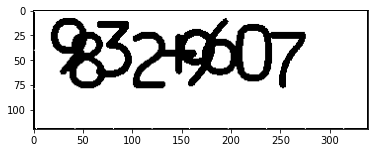

In [58]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray,230,255,0)
thresh = cv2.bitwise_not(thresh) # 이건 부정이군 비트연산

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

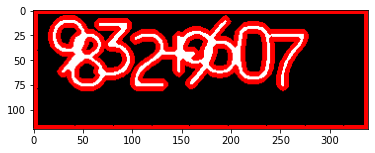

In [59]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    image = cv2.drawContours(image,[contours[i]], -1, (0,0,255), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

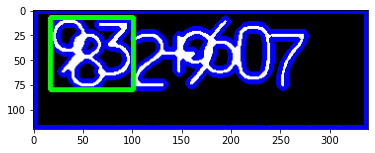

In [60]:
contour = contours[5]
x, y, w, h = cv2.boundingRect(contour)
image2 = cv2.rectangle(image, (x,y), (x+w, y + h), (0,255,0), 3)
plt.imshow(image2)
plt.show()

cv2.convexHull(contour): Convex Hull 알고리즘으로 외곽을 구하는 함수

대략적인 형태의 Contour 외곽을 빠르게 구할 수 있습니다. (단일 Contour 반환)

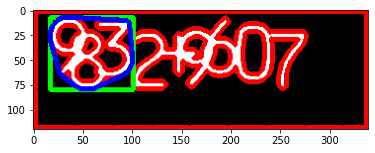

In [61]:
contour = contours[5]
hull = cv2.convexHull(contour)
image3 = cv2.drawContours(image, [hull], -1, (255, 0, 0), 4)

plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.show()

cv2.approxPolyDP(curve, epsilon, closed): 근사치 Contour를 구합니다.

curve: Contour
epsilon: 최대 거리 (클수록 Point 개수 감소)
closed: 폐곡선 여부

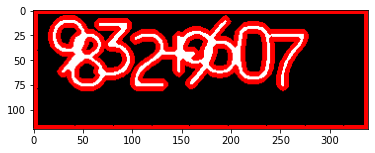

In [63]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    image = cv2.drawContours(image, [contours[i]], -1, (0, 0, 255), 4)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

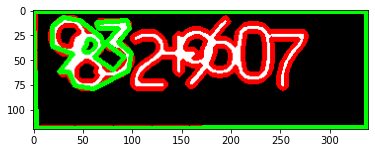

In [67]:
contour = contours[5]
epsilon = 0.01 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)
image = cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

39206.5
920.5269113779068
{'m00': 39206.5, 'm10': 6644982.666666666, 'm01': 2333287.1666666665, 'm20': 1492953487.5833333, 'm11': 395460316.5416666, 'm02': 183605662.75, 'm30': 377342918282.5, 'm21': 88849348795.56667, 'm12': 31118450363.333332, 'm03': 16252733891.95, 'mu20': 366716903.33581233, 'mu11': -966.1246201992035, 'mu02': 44745295.154541075, 'mu30': -251335.06579589844, 'mu21': -111708.32232666016, 'mu12': -163590.5579881668, 'mu03': 21139.5362739563, 'nu20': 0.23856942307778903, 'nu11': -6.285169599916377e-07, 'nu02': 0.029109264267235053, 'nu30': -8.257677151395138e-07, 'nu21': -3.670205181980614e-07, 'nu12': -5.374809156076429e-07, 'nu03': 6.945448106405309e-08}


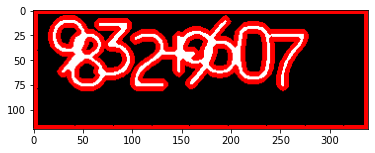

In [68]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    image = cv2.drawContours(image, [contours[i]], -1, (0, 0, 255), 4)

contour = contours[0]
area = cv2.contourArea(contour)
print(area)

length = cv2.arcLength(contour, True)
print(length)

M = cv2.moments(contour)
print(M)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [69]:
#BGR를 HSV로 변환하는 코드

def hsv():
    blue = np.uint8([[[255, 0, 0]]])
    green = np.uint8([[[0, 255, 0]]])
    red = np.uint8([[[0, 0, 255]]])
    
    hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
    hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
    hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
    
    print('HSV for Blue', hsv_blue)
    print('HSV for Green', hsv_green)
    print('HSV for Red', hsv_red)
    
hsv()

HSV for Blue [[[120 255 255]]]
HSV for Green [[[ 60 255 255]]]
HSV for Red [[[  0 255 255]]]


## 색상 트래킹

In [71]:
def tracking():
    try:
        print("카메라 구동")
        #cap = cv2.VideoCapture('./video/KakaoTalk_20200724_175615914.mp4')
        cap = cv2.VideoCapture(0)
    except:
        print("카메라 구동 실패")
        return
    
    while True:
        ret, frame = cap.read()
        
        if ret:
            hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
            
            lower_blue = np.array([110, 100, 100])
            upper_blue = np.array([150, 255, 255])
            lower_green = np.array([50, 100, 100])
            upper_green = np.array([90, 255, 255])
            lower_red = np.array([-10, 100, 100])
            upper_red = np.array([30, 255, 255])
            
            mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
            mask_green = cv2.inRange(hsv, lower_green, upper_green)
            mask_red = cv2.inRange(hsv, lower_red, upper_red)
            
            res1 = cv2.bitwise_and(frame, frame, mask = mask_blue)
            res2 = cv2.bitwise_and(frame, frame, mask = mask_green)
            res3 = cv2.bitwise_and(frame, frame, mask = mask_red)
            
            cv2.imshow('Origianl', frame)
            cv2.imshow('Blue', res1)
            cv2.imshow('Green', res2)
            cv2.imshow('Red', res3)
            
            k = cv2.waitKey(0) & 0xFF
            if k == 27:
                break
                
        else:
            print("비디오 종료")
            break
    
    cap.release()
    cv2.destroyAllWindows()

In [73]:
tracking()

카메라 구동


## 윤곽선 예제 

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [100]:
img = cv2.imread('./track.png')
img_copy = img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img_gray, ksize= (5,5), sigmaX = 1)

ret, img_thresh = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #cv2.THRESH_OTSU 해서 더 잘 나오게 됨

img_contours, _ = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, img_contours, -1, (0,0,225), 2)

cv2.imshow('threshold', img_thresh)
cv2.imshow('contours', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


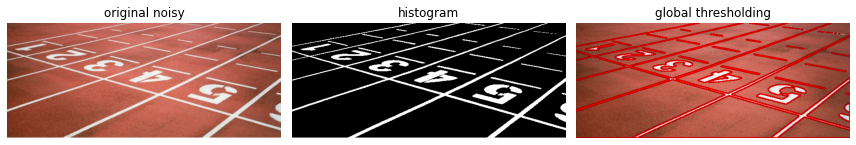

In [98]:
# 결과물 RGB로 만들기 
b, g, r = cv2.split(img_copy)
img_copy = cv2.merge([r, g, b])
b, g, t = cv2.split(img)
img = cv2.merge([r, g, b])

title  = ['Ofiginal', 'Threshold', 'Contours']
images = [img_copy, img_thresh, img]

plt.figure(figsize = (12, 12))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## 윤곽선 예제 2 

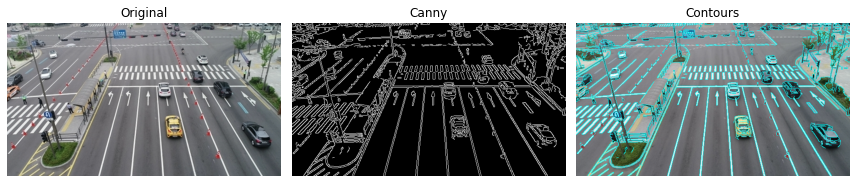

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img2 = cv2.imread('./road.png')
img2_copy = img2.copy()

img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2_canny = cv2.Canny(img2,127, 255)

contours2, _ = cv2.findContours(img2_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2, contours2, -1, (255,255,0), 1)

cv2.imshow('canny',img2_canny)
cv2.imshow('contour',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


b, g, r = cv2.split(img2_copy)
img2_copy = cv2.merge([r,g,b])
b, g, r = cv2.split(img2)
img2 = cv2.merge([r,g,b])

titles = ['Original', 'Canny', 'Contours']
images = [img2_copy, img2_canny, img2]

plt.figure(figsize = (12,12))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()
    

## CHAIN_APPROX_SIMPLE vs CHAIN_APPROX_NONE

In [22]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

In [20]:
img = cv2.imread('./cat1.jpg')
simple_ = img.copy()
simple = img.copy()
none_ = img.copy()
none = img.copy()

img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

contours_simple, _ = cv2.threshold(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_none,_ = cv2.threshold(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)





비디오 재생


영상을 불러옵니다


In [6]:
contours()

비디오 재생
비디오 재생 실패


영상을 불러옵니다.
1280.0
720.0


# Thresh

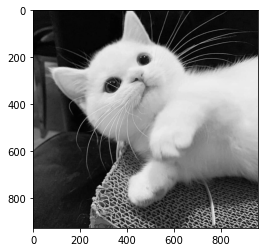

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./cat1.jpg', cv2.IMREAD_GRAYSCALE)
img.shape
plt.imshow(img, cmap='gray')


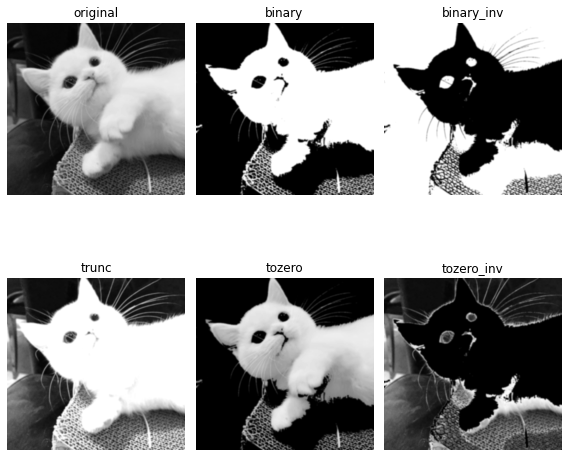

In [81]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['original', 'binary', 'binary_inv', 'trunc', 'tozero', 'tozero_inv']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(8, 8))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='bicubic')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


## OTSU 

앞서 threshold 함수를 사용할 때 우리는 임의로 임계값을 정하여 사용하였다. 하지만 어떤 이미지에 어떤 임계값을 적용해야 가장 좋은 결과를 나타날지에 대해서는 여러번의 시행착오를 거쳐서 알아내야 한다. 

이런 시행착오를 방지하기 위해 나타난 방법이 바로 OTSU와 Triangle 알고리즘이다. 그 중 OTSU 알고리즘은 이미지의 히스토그램을 이용해서 두 개의 클래스로 가장 잘 분할할 수 있는 임계값이 얼마인지를 찾는 알고리즘이다. 기본적인 알고리즘은 어떤 임계값 T를 기준으로 이미지의 픽셀들을 두 클래스로 분류했을 때, 두 클래스 간의 급간분산(between-class variance interclass variance)를 최대화 하는 과정이다. 급간분산의 값이 커질수록 두 클래스 간의 분리도가 커지므로 이 값을 최대화하는 T값을 찾는 것이 OTSU 알고리즘의 목적이라고 할 수 있다.

OTSU binarization을 따로 적용하는 함수는 없지만 threshold() 함수에서 임계값을 처리하는 방식에 cv2.THRESH_OTSU 플래그를 전달하면 된다. 이때, threshold 함수의 thresh 파라미터에는 0을 인자로 전달해주면 된다. 이렇게 하면 OTSU에서 0~255사이의 최적 임계값(Optimal Threshold)를 계산한 뒤 적용한 결과를 반환한다.

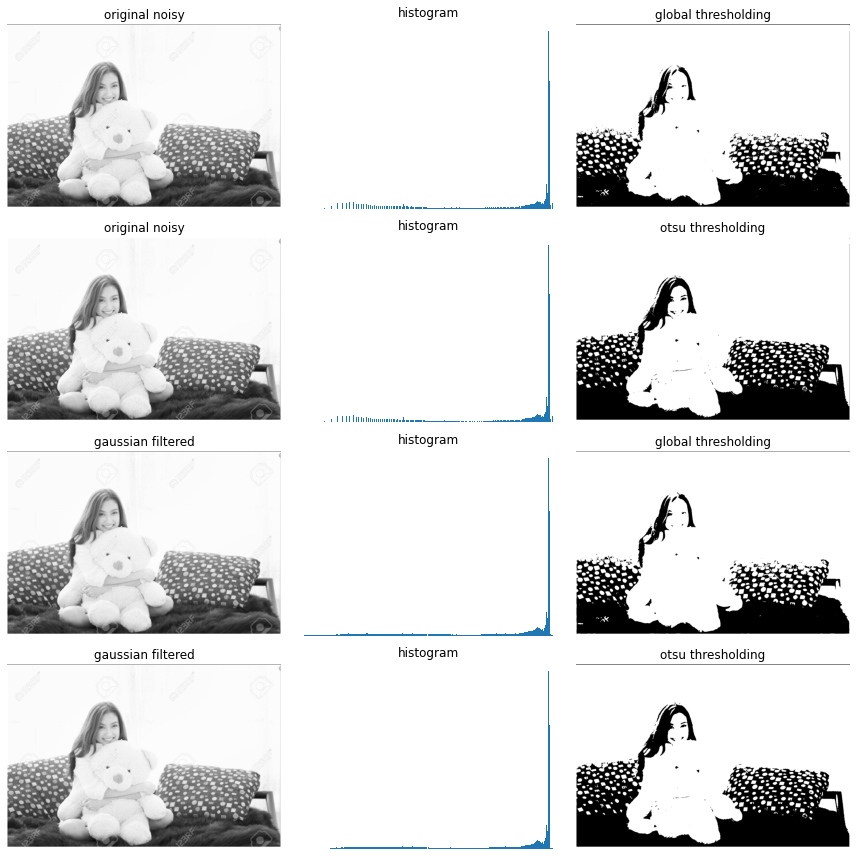

In [84]:
img = cv2.imread('./test1.png',  cv2.IMREAD_GRAYSCALE)

# global thresholding
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# otsu binarization
ret, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# gaussian blur and global thresholding
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret, th3 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

# gaussian blur and otsu binarization
ret, th4 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


titles = ['original noisy', 'histogram', 'global thresholding',
          'original noisy', 'histogram', 'otsu thresholding',
          'gaussian filtered', 'histogram', 'global thresholding',
          'gaussian filtered', 'histogram', 'otsu thresholding']
images = [img, 0, th1, img, 0, th2, blur, 0, th3, blur, 0, th4]

plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(4, 3, i*3+1)
    plt.imshow(images[i*3], cmap='gray')
    plt.title(titles[i*3])
    plt.axis('off')
    
    #히스토그램 넣는 부분
    plt.subplot(4, 3, i*3+2)
    plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1])
    plt.axis('off')

    plt.subplot(4, 3, i*3+3)
    plt.imshow(images[i*3+2], cmap='gray')
    plt.title(titles[i*3+2])
    plt.axis('off')

plt.tight_layout()
plt.show()